## Homework Three

In this homework, we will extend our understanding of linear regression by considering how using a **held-out test set** can help determine how well the model 
generalizes to unseen data. Next week, we will refine this approach further by distinguishing between validation and testing sets.

Secondly, we will extend the linear regression framework by generalizing the basic idea of polynomial regression: we will perform **feature engineering** by
adding new features computed from the originals using log scaling and other non-linear functions. 

In [1]:
# Useful imports and utilities

import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import os
import kagglehub
import seaborn as sns



from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing,make_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

from tqdm import tqdm
from math import isclose

# globals

random_state = 42



### Problem One:  Model Selection using Test Sets

This week’s video explores the challenge of model selection in polynomial regression: how do we determine the best polynomial degree for our data? As we saw, increasing model complexity (in this case, polynomial degree) generally reduces training MSE. However, this does not necessarily mean better generalization, so: 

- How do we select a model that performs well on new data?
- How do we strike the right balance between:
   - Underfitting (high bias, low variance), and
   - Overfitting (low bias, high variance)?

To address this, we introduce **testing sets** and examine how evaluating models on unseen data provides a more reliable measure of generalization. 

### Part A

The following function will generate datasets suitable for polynomial regression with various characteristics:

- `n_samples`: number of samples
- `degree`: degree of the underlying polynomial model (with no noise)
- `noise`: standard deviation of the noise added to the model
- `show_data`, `show_model`: whether to show a plot of the dataset and the underlying model
- `random_state`: random seed which controls how random choices are made; set to None if you want a different set of choices each time

Your first task, as usual, is to play around with this a bit, changing the parameters in the call in the last line. There is no coding to be done (yet). 

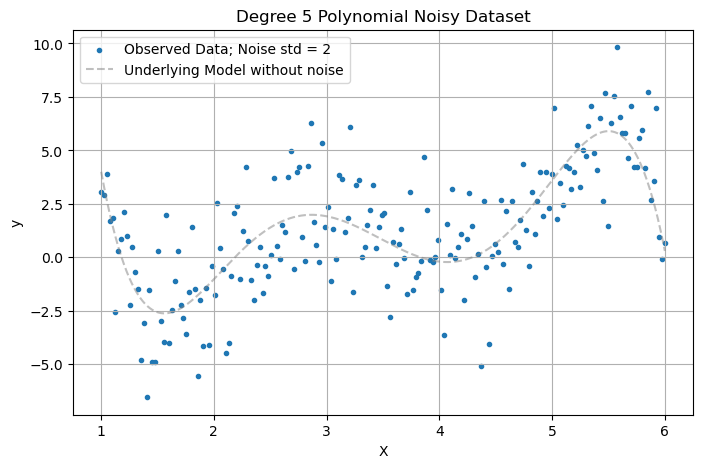

In [2]:
# The polynomials

def f(x,degree):
    if degree==2:
        return 0.125*x**2 - 0.95*x + 1.925 
    elif degree==3:
        return 0.125*x**3 - 1.2*x**2 + 3*x + 0.5   
    elif degree==4:
        return 0.41*x**4 - 5.99*x**3 + 30.55*x**2 - 62.37*x + 41.4
    elif degree==5:
        return  -0.4*x**5 + 7.0*x**4 - 46.17*x**3 + 142.0*x**2 - 200.43*x + 102.0 
    elif degree==6:
        return -0.5219*x**6 + 10.7724*x**5 - 87.6206*x**4 + 355.7914*x**3 - 751.5246*x**2 + 774.0203*x - 300.917
    else:
        print("Degree must be in range [2..6]")
        return None
            
def make_poly_model(n_samples=10, degree=4,noise=1.0, show_data=False, show_model=True,random_state=random_state):
    
    lb,ub = 1,6
            
    X_all = np.linspace(lb,ub,1000)
    y_perfect_model = f(X_all,degree)

    np.random.seed(random_state)
    X = np.linspace(lb,ub,n_samples)             # evenly spaced samples for simplicity
    y = f(X,degree) + np.random.normal(0, noise,size=n_samples)

    # Plotting the scatter plot of the data 

    if show_data:
      
        plt.figure(figsize=(8, 5))
        plt.scatter(X, y, marker='.',label=f'Observed Data; Noise std = {noise}')
        if show_model:
            plt.plot(X_all, y_perfect_model, label='Underlying Model without noise', linestyle='--',color='grey', alpha=0.5)
        plt.xlabel('X')
        plt.ylabel('y')
        plt.title(f'Degree {degree} Polynomial Noisy Dataset')
        plt.legend()
        plt.grid(True)
        plt.show()
        
    return X.reshape(-1,1),y

    
X,y = make_poly_model(n_samples=200,degree=5,noise=2,show_data=True,random_state=None)


### Part B: Create a dataset with the following parameters:

    n_samples=200
    degree = 5
    noise=10
    test_size = 0.3
    random_state = 42

(leaving the others at the defaults) and then split it into four subsets using 
sklearn's `test_test_split`; your results should match the test case. 

In [3]:
# Your code here

# Solution - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

n_samples=200
degree = 5
noise=10
test_size = 0.3
random_state = random_state

X_full,y_full = make_poly_model( n_samples=n_samples,degree=degree,
                                 noise=noise,show_data=False,show_model=False,
                                 random_state=random_state
                               ) 

X_train, X_test, y_train, y_test = train_test_split( X_full, 
                                                     y_full, 
                                                     test_size=test_size, 
                                                     random_state=random_state
                                                   )

#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

# Test: Should print (140, 1) (60, 1) (140,) (60,)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(140, 1) (60, 1) (140,) (60,)


### Part C: Investigating the model selection problem using test/train plots

In this part, you will complete the template below to:
- Train polynomial models of degree 1 .. 10 on the training dataset just produced;
- Calculate the training MSE and the testing MSE for each model;
- Plot the MSE curves vs the model degree (see the Appendix for an example plot); and
- Print out the minimal testing MSE found, and the "best" model which produced this result. 

In the remaining parts of the problem, you will answer questions about this plot. 


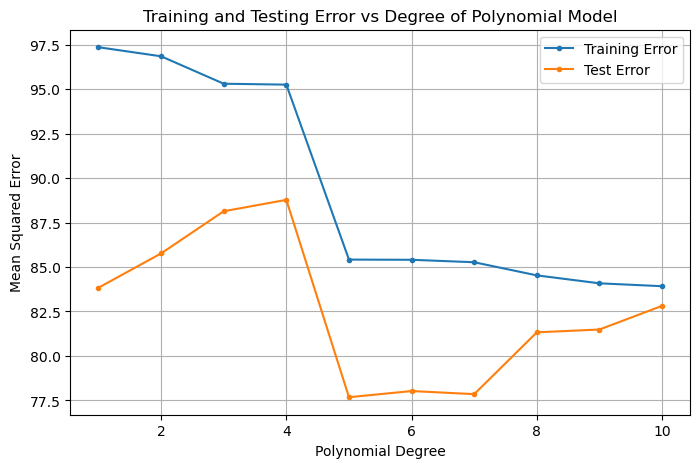

Minimal Test MSE 77.6807 found at degree 5.


In [4]:
# Template for Problem One Part C

degrees = range(1,11) # try polynomials of these degrees
train_errors = []     # store training MSEs for each degree here
test_errors  = []     # store testing MSEs for each degree here

for d in degrees:

    # Use PolynomialFeatures to transform the data into appropriate form for
    # a polynomial model of degree d.

        # Your code here

    # Fit a linear regression model on the transformed data

        # Your code here

    # Predict on the train and test sets

        # Your code here

    # Calculate the MSEs and append to the appropriate lists

        # Your code here
    
    # Solution - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
    
    # Use PolynomialFeatures to transform the data into appropriate form for
    # a polynomial model of degree d.
    poly = PolynomialFeatures(degree=d, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly  = poly.transform(X_test)

    # Fit a linear regression on the transformed training data
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predict on train and test sets
    y_train_pred = model.predict(X_train_poly)
    y_test_pred  = model.predict(X_test_poly)

    # Calculate the MSEs and append to the appropriate list
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse  = mean_squared_error(y_test, y_test_pred)

    train_errors.append(train_mse)
    test_errors.append(test_mse)

    # End Solution - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
    
# Plot training and test MSEs vs degree of model

# Your code here

# Solution - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

plt.figure(figsize=(8, 5))
plt.plot(degrees, train_errors, marker='.', label='Training Error')
plt.plot(degrees, test_errors, marker='.', label='Test Error')
plt.title('Training and Testing Error vs Degree of Polynomial Model')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid()
plt.show()

# End Solution - - - - - - - - - - - - - - - - - - - - - - - - - - -

# Calculate minimal MSE and degree for test set and print out 
# Hint: notice carefully that the MSE lists are for degrees [1, 2, 3, ....]

# Solution - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

min_mse = min(test_errors)
best_degree = test_errors.index(min_mse) + 1      

print(f"Minimal Test MSE {min_mse:.4f} found at degree {best_degree}.") 

# End Solution - - - - - - - - - - - - - - - - - - - - - - - - - - -

### Part D: Minimum MSE 

Set the variable to the minimum test MSE found for the given parameter choices.

In [5]:

a1d = min_mse

print(f'a1d = {a1d:.4f}')              # Do NOT change this print statement in any way, it is used by the auto-grader!

a1d = 77.6807


### Part E: Lower Bound for Testing MSE

The *realistic* lower bound for the testing MSE is the MSE of the data points compared to
the underlying model with no noise.   "Realistic" means that you can't expect on average
to do better than  the noise in the dataset, although sometimes you get a lucky split in
the data. 

Calculate this lower bound and assign it to the variable `a1e`. 

Hint: Construct a second dataset exactly the same as the original but with noise = 0.0.

In [6]:
# Your code here

# Solution - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

X_baseline,y_baseline = make_poly_model( n_samples=n_samples,degree=degree,
                                 noise=0.0,                                 # <==
                                 show_data=False,show_model=False,
                                 random_state=42
                               ) 

poly = PolynomialFeatures(degree=5, include_bias=False)

X_baseline_poly = poly.fit_transform(X_baseline)


X_train_baseline_poly, X_test_baseline_poly, y_train_baseline, y_test_baseline = train_test_split( X_baseline_poly, 
                                                                                         y_baseline, 
                                                                                         test_size=test_size, 
                                                                                         random_state=42
                                                                                       )

model_baseline = LinearRegression()
model_baseline.fit(X_train_baseline_poly, y_train_baseline)

y_test_pred_baseline = model_baseline.predict(X_test_baseline_poly)

# Compare this with actual y_test from above

lb_mse = mean_squared_error(y_test, y_test_pred_baseline)

# End Solution - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

a1e = lb_mse

print(f'a1e = {a1e:.4f}')                  # Do NOT change this print statement in any way, it is used by the auto-grader!

a1e = 78.5686


In [7]:
# Another solution: calculate the "underlying model" predictions for X_test from the original degree 5 polynomial

y_test_pred2_baseline = -0.4*X_test**5 + 7.0*X_test**4 - 46.17*X_test**3 + 142.0*X_test**2 - 200.43*X_test + 102.0 

lb_mse2 = mean_squared_error(y_test, y_test_pred2_baseline)

print(f'lower bound for MSE = {lb_mse2:.4f}')

lower bound for MSE = 78.5686


### Relationship of mean of MSE over 1000 trials compared with `noise`$^2$

100.02697686725176


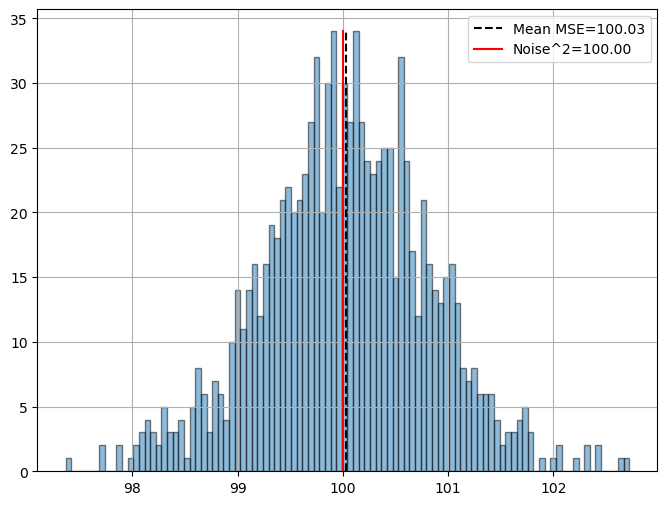

In [8]:
mses = []

n_samples=100000

for _ in range(1000):

    X_full,y_full = make_poly_model( n_samples=n_samples,degree=degree,
                                     noise=noise,show_data=False,show_model=False,
                                     random_state=None
                                   ) 

    X_train, X_test, y_train, y_test = train_test_split( X_full, 
                                                       y_full, 
                                                       test_size=test_size, 
                                                       random_state=None
                                                     )

    # Use PolynomialFeatures to transform the data into appropriate form for
    # a polynomial model of degree d.
    poly = PolynomialFeatures(degree=5, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly  = poly.transform(X_test)

    # Fit a linear regression on the transformed data
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predict on train and test sets
    y_test_pred  = model.predict(X_test_poly)

    # Calculate the MSEs and append to the appropriate list
    test_mse  = mean_squared_error(y_test, y_test_pred)

    mses.append(test_mse)

mu = np.mean(mses)
print(mu)
plt.figure(figsize=(8,6))
n,_,_ = plt.hist(mses,bins=100,edgecolor='black',alpha=0.5)
ub = np.max(n)
plt.plot([mu,mu],[0,ub],linestyle='--',label=f'Mean MSE={mu:.2f}',color='black')
plt.plot([noise**2,noise**2],[0,ub],label=f'Noise^2={noise**2:.2f}',color='red')
plt.legend()
plt.grid()
plt.show()

In [9]:
np.max(n)

34.0

#### For the last two parts of this problem, you must experiment with changes to the following parameters:

- `n_samples`:  Try 10, 20, 50, 100, 200, 500, 1000
- `noise`: Try 0, 5, 10, 20, 50, 100, 500, 1000
- `random_state`: None           (then you can try multiple times with the same parameter choices)

It is sufficient for this problem to simply change each of these
separately, giving 7 + 8  = 15 trials. 

**Optional:**  For each parameter choice, try multiple times, with the random choices being different each time, by setting `random_state = None`. 

**Answer the following questions** based on these experiments. 



### Part F: Training MSE

Set the variable to the single **most correct** answer.

As the degree increases, throughout all the experiments, the training MSE appears to ...

1. Fluctuate unpredictably.
2. Never increase (gets smaller or stays the same in each step).
3. Decrease rapidly to degree 5 and then flatten out (not change much).
4. Always be higher than the test MSE.

In [10]:

a1f = 2                       # Must be one of 1, 2, 3, 4

print(f'a1f = {a1f}')         # Do NOT change this print statement in any way, it is used by the auto-grader!

a1f = 2


### Part G: Effect of Noise

Set the variable to the single **most correct** answer.

If we leave all parameters the same, except we set noise to increasingly larger values ...

1. The best degree alternates between 5 and 6. 
2. The shapes of both plots is always essentially the same, the only change being the scale of the Y axis. 
3. The least MSE increases approximately proportionally to the square of the noise. 
4. The best degree found is always the same, and the least MSE increases approximately proportionally with the noise. 

In [11]:
# Give the degree where this minimum test MSE was found

a1g = 3                                # Must be one of 1, 2, 3, 4

print(f'a1g = {a1g}')                  # Do NOT change this print statement in any way, it is used by the auto-grader!

a1g = 3


### Optional: Run more tests, with different degrees of polynomial as well!

If you have time to try more experiments, say by changing the degree, you will see that I chose the default parameters for our investigations
with some care, because you won't always get the beautiful curves shown in the testbooks, and you won't always get the correct degree when selecting
the "best" model based on the testing MSE. 

## Prelude to Problem Two

We have seen that it is possible to preprocess data by adding calculating new features which encode non-linear functions
of the existing features (in statistical learning theory, these are called "basis functions").  We have looked at only the simplest 
example, namely, extending a univariate regression problem with powers $x^2$, $x^3$, and so on. However, *basically* any non-linear function
of the features may be calculated and either added to, or replace, existing features. 

Examples of non-linear basis functions calculated from an existing feature $x$ and target $y$ include:

- **Polynomial Transforms** used in polynomial regression. In addition to new features such as $x^3$, when more than one feature occurs, we will get **Interaction Terms**  
such as $x_1x_2$. For example a quadratic polynomial regression on features $x_1$ and $x_2$ would create 3 new features: 
$$
y = \beta_0
+ \beta_1 x_1 + \beta_2 x_2
+ \beta_3 x_1^2 + \beta_4 x_2^2 + \beta_5 x_1 x_2
$$

- **Log Transforms** such as $\log(y)$ which (like using log scaling in a graph) helps scale a feature (or the target) if it ranges widely or exhibits exponential growth.

- **Exponentials** such as $2^{x_1}$ which again helps scale a feature which exhibits exponential decay instead of exponential growth.

 

## Problem Two: Linear Regression with Feature Engineering on the California Housing Dataset

The transforms we will investigate in this problem, using the **CA Housing Dataset**, are as follows:

#### 2.1 Log-transform the target:

Because housing prices can vary wildly,  replace $y$ by its log-transform:

$$
    y = \log(\text{MedHouseVal}).
$$


#### 2.2 Log-transform a feature


Since  *Median Income* ranges widely, add a feature

$$
    \text{LogMedInc} = \log(\text{MedInc}).
$$


#### 2.3 Polynomial features for slight curvature

You might suspect that increasing *population* from 1,000 to 2,000 has a bigger effect on price than from 10,000 to 11,000 (diminishing returns).  
Thus, add a quadratic term to include polynomial regression on this feature:

$$
    \text{PopSquared} = (\text{Population})**2
$$


#### 2.4 Interaction features

It might be that *average rooms* matter more if *average bedrooms* is above some threshold. One way to let your linear model handle this is to add the product term:

$$\text{RoomsTimesBeds} = \text{AveRooms} \times \text{AveBedrms}. $$

In an ordinary linear regression, you’d then have something like

$$\log(\text{MedHouseVal}) \approx \beta_0 + \beta_1\,\text{AveRooms} + \beta_2\,\text{AveBedrms} + \beta_3\,\text{RoomsTimesBeds} + \dots$$

The coefficient $\beta_3$ shows how the slope for *AveRooms* depends on *AveBedrms* (and vice versa).



**Note:** The usual practice is that we **replace** the target by a new target, but **add** transformed features. In a later lesson, we will investigate **feature selection**, in which we may delete features which are insignificant or noisy. 



## Your Turn!
In this problem, you will apply feature engineering to the **California Housing Dataset** and evaluate its impact on linear regression performance.

### Part A. Load the Data  
- Code to load the dataset from `sklearn.datasets` is provided.  

### Part B. Train Regression Models & Compute Metrics  
Perform linear (multiple) regression using `MedHouseVal` as the target and compute **testing MSE and $R^2$ values** for each of the following cases:  

1. **Baseline Model** – Use the original dataset without feature engineering.  
2. **Single Transformations Models** – Apply each of the transformations (2.1–2.4) one at a time, keeping all other features unchanged (resulting in 4 models).  
3. **All Transformations Model** – Apply all transformations simultaneously and evaluate the model.  

### Part C. Summarize & Visualize Results  
- Display the results in **tabular format** showing testing MSE and $R^2$ values for all experiments (don't overthink this, but at least label and line up each column).  
- Plot results using two **bar charts** (at least give a title to each chart and label each bar).  
  - Compare the MSEs but exclude models with log-transformed target (where the MSE is in log-space and not directly comparable).  
  - Compare $R^2$ values for all models. 

### Part D. Complete Graded Questions  

 
**Note: To ensure reproducibility, always use `random_state=42` in all relevant functions.**


### Part A

In [12]:
# 1. Load the California Housing data into a DataFrame
data = fetch_california_housing(as_frame=True)
df = data.frame  # The dataset in pandas DataFrame format

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Part B

You may create additional code cells as you wish. 

In [13]:
# Create all the datasets; since sklearn models will accept dataframes, manipulate
# all the data as dataframes. 

# 1. Plain Regression: Use all original columns.
df_plain = df.copy()

# 2. Log-Transformed Target: Create a logarithmic version of the target and drop the original.
df_log_target = df.copy()
df_log_target["LogHouseVal"] = np.log(df_log_target["MedHouseVal"])
df_log_target.drop(columns=["MedHouseVal"], inplace=True)

# 3. Log of Median Income: Add a column with the log-transformed MedInc.
df_log_medinc = df.copy()
df_log_medinc["LogMedInc"] = np.log(df_log_medinc["MedInc"])

# 4. Population Squared: Add a column for Population squared.
df_population_sq = df.copy()
df_population_sq["PopulationSq"] = df_population_sq["Population"] ** 2

# 5. Rooms-Bedrooms Interaction: Add a column for the interaction between AveRooms and AveBedrms.
df_rooms_bed_inter = df.copy()
df_rooms_bed_inter["RoomsBedInteraction"] = df_rooms_bed_inter["AveRooms"] * df_rooms_bed_inter["AveBedrms"]

# 6. All Transformations: Apply all the above transformations.
df_all = df.copy()
df_all["LogHouseVal"] = np.log(df_all["MedHouseVal"])
df_all["LogMedInc"] = np.log(df_all["MedInc"])
df_all["PopulationSq"] = df_all["Population"] ** 2
df_all["RoomsBedInteraction"] = df_all["AveRooms"] * df_all["AveBedrms"]
df_all.drop(columns=["MedHouseVal"], inplace=True)

print(df_all.head(2))

# Put the datasets and their descriptive names into a list for easy iteration.
experiments = [
    ("Baseline", df_plain),
    ("Log-Target", df_log_target),
    ("Log MedInc", df_log_medinc),
    ("Population^2", df_population_sq),
    ("Rooms*Bedrooms", df_rooms_bed_inter),
    ("All", df_all),
]

# Create an empty dictionary to hold results
performance = {}

# For each experiment, we split the data, train a Linear Regression model, and evaluate its performance.
# Note that all the datasets are separate copies of original dataset

for name, X in experiments:
    
    # Determine which column is the target.
    # If "MedHouseVal" is still present, use it; otherwise, use "LogHouseVal".
    
    if "MedHouseVal" in X.columns:
        log_scale = False
        y = X["MedHouseVal"]
        X.drop(columns=["MedHouseVal"], inplace=True)
    else:
        log_scale = True
        y = X["LogHouseVal"]
        X.drop(columns=["LogHouseVal"], inplace=True)
    
    # For reproducibility, use a fixed random_state.
    X_test, X_test, y_test, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train a linear regression model.
    model = LinearRegression()
    model.fit(X_test, y_test)
    
    # Predict and evaluate the model.
    y_pred = model.predict(X_test)
        
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    performance[name] = (mse,r2)
    

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127    1.02381       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137    0.97188      2401.0  2.109842     37.86   

   Longitude  LogHouseVal  LogMedInc  PopulationSq  RoomsBedInteraction  
0    -122.23     1.509839   2.119287      103684.0             7.150416  
1    -122.22     1.276758   2.116424     5764801.0             6.062724  


### Part C

In [14]:
# Display table

names = performance.keys()

print('Experiment      Test MSE        R2')
print('----------      --------        ------')
for name in names:
    print(f'{name:<15}\t{performance[name][0]:.4f}\t\t{performance[name][1]:.4f}')

Experiment      Test MSE        R2
----------      --------        ------
Baseline       	0.5293		0.5961
Log-Target     	0.1273		0.6079
Log MedInc     	0.5293		0.5961
Population^2   	0.5290		0.5963
Rooms*Bedrooms 	0.5212		0.6023
All            	0.1196		0.6314


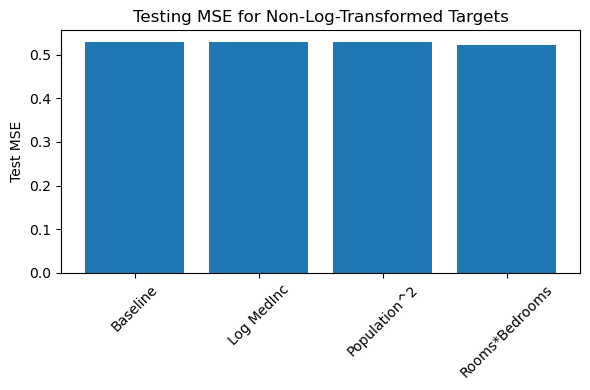

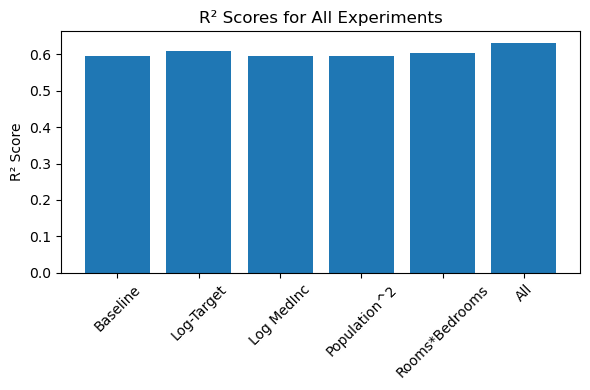

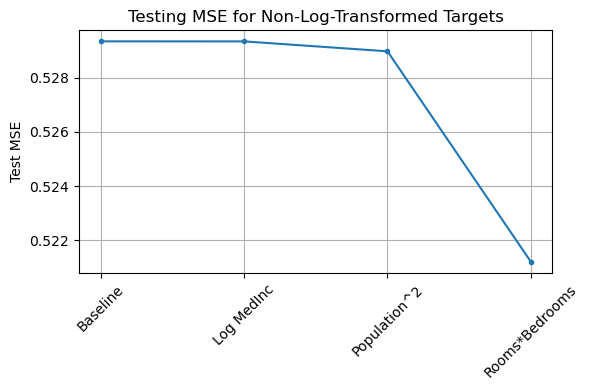

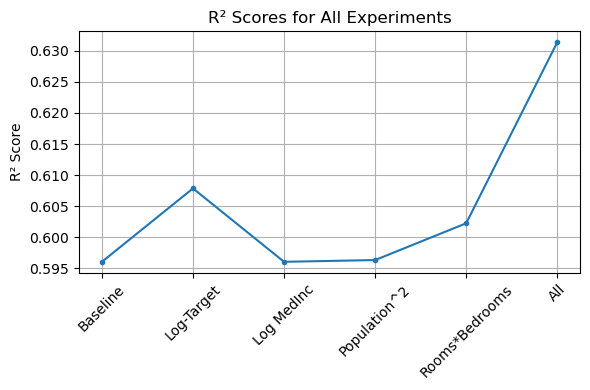

In [15]:
# Display Bar Charts

mse_names = [name for name in names if name not in ['Log-Target','All']]

mses = [ performance[name][0] for name in mse_names]
r2s  = [ performance[name][1] for name in names]

# Bar chart for MSE:
plt.figure(figsize=(6, 4))
plt.bar(mse_names, mses)
plt.title("Testing MSE for Non-Log-Transformed Targets")
plt.ylabel("Test MSE")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar chart for R²:
plt.figure(figsize=(6, 4))
plt.bar(names, r2s)
plt.title("R² Scores for All Experiments")
plt.ylabel("R² Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot  for MSE:
plt.figure(figsize=(6, 4))
plt.plot(mse_names, mses,marker='.')
plt.title("Testing MSE for Non-Log-Transformed Targets")
plt.ylabel("Test MSE")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()

# Bar chart for R²:
plt.figure(figsize=(6, 4))
plt.plot(names, r2s,marker='.')
plt.title("R² Scores for All Experiments")
plt.ylabel("R² Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()


### Part D


In [16]:
# Assign to the variable the MSE of the original data set with no transformations

a2d1 = np.around(performance['Baseline'][0],4)           # I like to round but not strictly necessary

print(f'a2d1 = {a2d1}')                                  # Do NOT change this print statement in any way, it is used by the auto-grader!

a2d1 = 0.5293


In [17]:
# Assign to the variable the MSE score of the dataset after transformation 2.3

a2d2 = np.around(performance['Population^2'][0],4)           # I like to round but not strictly necessary

print(f'a2d2 = {a2d2}')                                      # Do NOT change this print statement in any way, it is used by the auto-grader!

a2d2 = 0.529


In [18]:
# Assign to the variable the $R^2$  score of the dataset after transformation 2.1

a2d3 = np.around(performance['Log-Target'][1],4)           # I like to round but not strictly necessary

print(f'a2d3 = {a2d3:.4f}')                                # Do NOT change this print statement in any way, it is used by the auto-grader!

a2d3 = 0.6079


In [19]:
# Assign to the variable the R^2 score of the best result, i.e., the best R^2 score found in any experiment
# Note that you do not have to specify which experiment(s), just give the largest value.

a2d4 = np.around(performance['All'][1],4)           # I like to round but not strictly necessary

print(f'a2d4 = {a2d4:.4f}')                         # Do NOT change this print statement in any way, it is used by the auto-grader!

a2d4 = 0.6314


### Part E

In [20]:
# How many hours did you spend on this homework?  Assign to the variable an integer value. 

a2e = 5

print(f'a2e = {a2e}')             # Do NOT change this print statement in any way, it is used by the auto-grader!

a2e = 5


### Hours spent on Homework 03


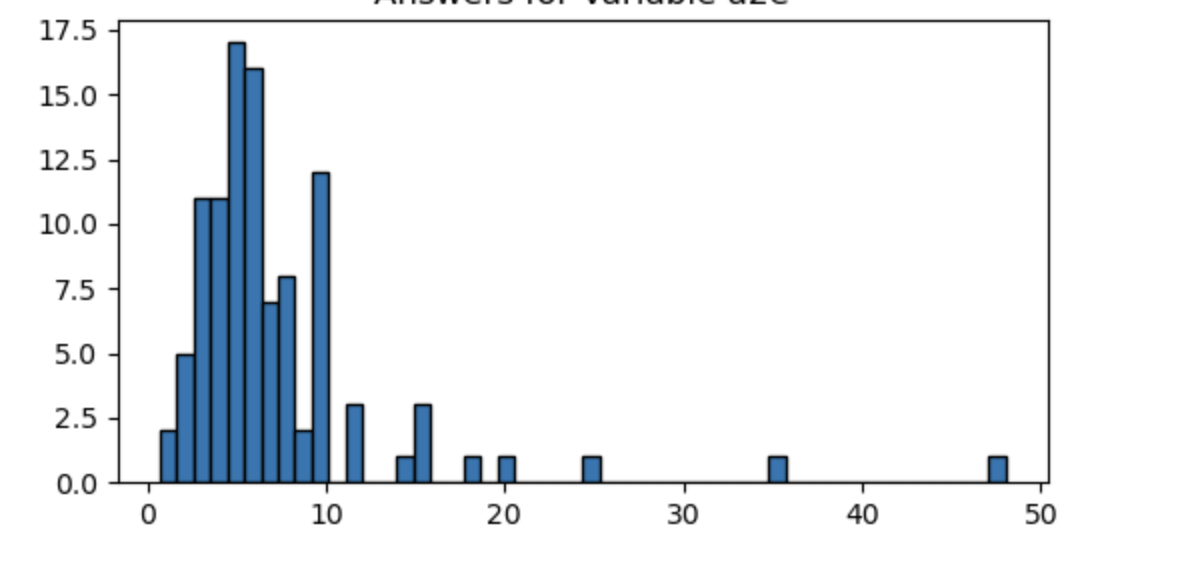

## Appendix

Here is a sample of the graphic I expect in Problem One. 

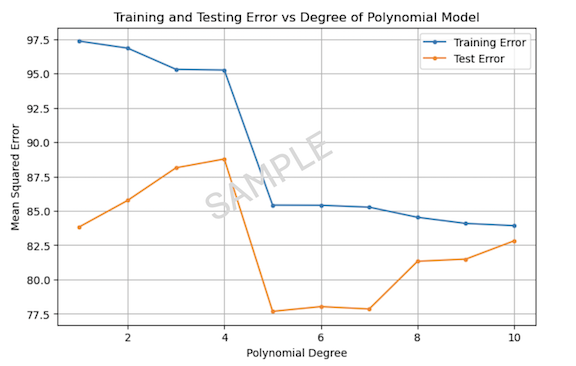